In [83]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import skimage.filters as skfil
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import img_as_ubyte
from functions import reorder_file_paths, extract_filename_number

Remove green pixels from the image and mask them out with black

In [2]:
img_number = 25

# Load in RGBVI image that contains rocks
rgbvi_img = cv2.imread(f'results/cropped_rgbvi_gray/image_{img_number}.jpg', 0)

# Also load in the actual image
img = cv2.imread(f'test_photos_cropped/image_{img_number}.jpg')

# plt.hist(rgbvi_img.flatten(), bins = 100)

# Threshold it to only include plants
ret, thresh = cv2.threshold(rgbvi_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Define a kernel for morphological operations
kernel = np.ones((3,3), np.uint8)

# Dilate the image
img_dilated = cv2.dilate(thresh, kernel, iterations = 2)

# Then erode it
img_dilated_eroded = cv2.erode(img_dilated, kernel, iterations = 1)

# Invert the image so it'll capture everything but the plants
mask = cv2.bitwise_not(img_dilated_eroded)

img_masked = cv2.bitwise_and(img, img, mask = mask)


# plt.imshow(img_masked)
cv2.imshow('masked', img_masked)

cv2.waitKey(0)
cv2.destroyAllWindows()

Try it on all the photos

In [4]:
# Get list of files in folders that contain the og cropped photos and their rgbvi counterparts
files_og = reorder_file_paths('test_photos_cropped\\*')
files_rgbvi = reorder_file_paths('results\\cropped_rgbvi\\*')

# Define a kernel for morphological operations
kernel = np.ones((3,3), np.uint8)

In [36]:
for i in range(len(files_og)):
    img_og = cv2.imread(files_og[i]) # Load in original file
    img_rgbvi = cv2.imread(files_rgbvi[i], 0) # Load in RGBVI image

    file_number = extract_filename_number(files_og[i])

    # Threshold RGBVI image to only include plants
    _, img_thresholded = cv2.threshold(img_rgbvi, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # thresh = skfil.threshold_otsu(img_rgbvi) 
    # img_thresholded = img_rgbvi <= thresh # dark pixels true, light pixels false
    # img_thresholded = img_as_ubyte(img_thresholded) # Convert back to ubyte

    # Dilate the image
    img_dilated = cv2.dilate(img_thresholded, kernel, iterations = 2)

    # Then erode it
    img_dilated_eroded = cv2.erode(img_dilated, kernel, iterations = 1)

    # Invert the image so it'll capture everything but the plants
    mask = cv2.bitwise_not(img_dilated_eroded)


    # Ensure mask is the same size and type as img_og
    if mask.shape != img_og.shape[:2]:
        mask = cv2.resize(mask, (img_og.shape[1], img_og.shape[0]))
    if mask.dtype != img_og.dtype:
        mask = mask.astype(img_og.dtype)

    img_masked = cv2.bitwise_and(img_og, img_og, mask = mask)

    # plt.imshow(img_masked)
    cv2.imwrite(f'results/erasing_green/image_{file_number}.jpg', img_masked)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

    

Entropy filter didn't really accomplish anything. Do grain size analysis on what i have

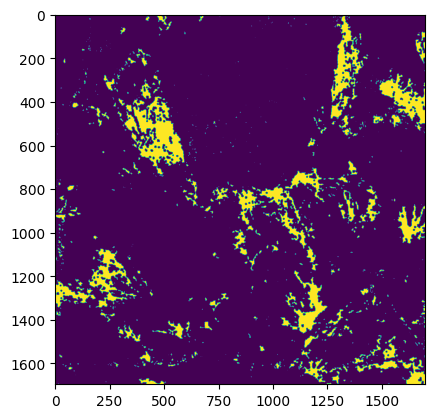

In [93]:
# Define kernel
kernel = np.ones((5,5), np.uint8)

img = cv2.imread('results/erasing_green/image_27.jpg', 0)

img_blurred = cv2.GaussianBlur(img, (5, 5), 0)

entropy_img = entropy(img_blurred, disk(3))

# fig, ax = skfil.try_all_threshold(entropy_img, figsize=(10,8), verbose=False)

entropy_thresh = skfil.threshold_otsu(entropy_img)
binary = entropy_img <= entropy_thresh

# _, img_thresholded = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# # Try edge detection
# edges = cv2.Canny(img_blurred, 150, 200)

# # Threshold
# _, binary = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# img_thresholded = cv2.erode(binary, kernel, iterations = 3)
# img_thresholded = cv2.dilate(binary, kernel, iterations = 1)

plt.imshow(binary)

(array([470618.,  52045.,  21506.,  31667.,  20959.,  30522.,  19868.,
         28826.,  18753.,  26866.,  25973.,  17206.,  25356.,  16537.,
         24804.,  16526.,  24668.,  16473.,  23903.,  16020.,  24264.,
         24468.,  16625.,  24816.,  16716.,  25105.,  17056.,  25630.,
         17105.,  25872.,  25619.,  17389.,  26345.,  17628.,  26493.,
         17629.,  26243.,  17949.,  26621.,  17722.,  26474.,  26987.,
         17986.,  27189.,  18322.,  27575.,  18420.,  28427.,  19271.,
         29214.,  29618.,  20328.,  30906.,  21069.,  32563.,  22739.,
         34264.,  23481.,  36241.,  24414.,  37199.,  38255.,  25888.,
         39588.,  26690.,  40895.,  27842.,  42445.,  28486.,  43521.,
         44089.,  29478.,  44210.,  29337.,  43433.,  28305.,  41948.,
         27426.,  39874.,  25695.,  36687.,  34773.,  22090.,  30506.,
         18676.,  25194.,  15121.,  19969.,  11974.,  15867.,  13804.,
          7783.,  10278.,   5826.,   7157.,   3892.,   4404.,   2141.,
      

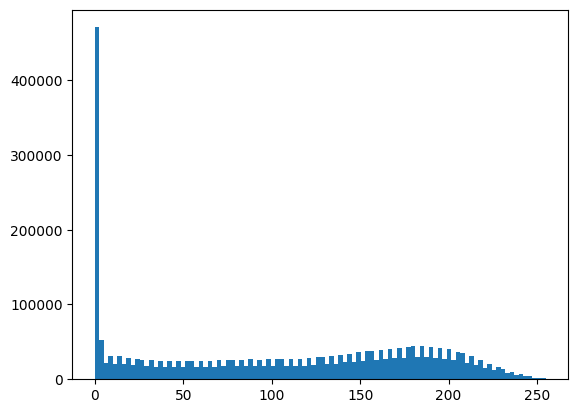

In [95]:
plt.hist(img.flat, bins = 100)

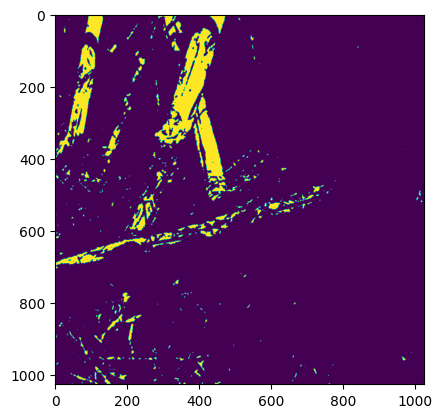

In [123]:
img = cv2.imread('results/erasing_green/image_4.jpg', 0)

img_blurred = cv2.GaussianBlur(img, (9, 9), 0)

white = img_blurred > 165

plt.imshow(white)